### ***Mounting the google drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


###***Importing required libraries***

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

In [ ]:
my_dir = "/content/drive/My Drive/dl_projects/Festival_recognition"


In [ ]:
predictor = load_learner(my_dir)

In [ ]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

In [ ]:
!cp -r '/content/drive/My Drive/test_data' '/content/test_data'

###***Predicting for a single image***

In [ ]:
all_test_images=os.listdir("/content/test_data")

Lohri


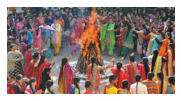

In [ ]:
all_test_images
idx=5
print(my_predictor("/content/test_data/"+all_test_images[idx]))
img = open_image("/content/test_data/"+all_test_images[idx])
img.show()

#***Creating video***

In [ ]:
import cv2
test_files=os.listdir("/content/test_data")
os.makedirs("/content/Test_Reult",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_COMPLEX_SMALL
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (255,0,0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("/content/Test_Reult/"+str(i)+".jpg", img)


In [ ]:
%cd "/content/Test_Reult/"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p -vf pad="width=ceil(iw/2)*2:height=ceil(ih/2)*2" ../final_output.mp4
%cd ..

/content/Test_Reult
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-

#***Installing KORA to make video***

In [ ]:
!pip install -U kora
from kora.drive import upload_public


Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.5.8)


In [ ]:
url = upload_public('final_output.mp4')

##***Video***

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

###***URL of video***

In [ ]:
url

'https://drive.google.com/uc?id=1_N_9G2v5Ke1gDilLI5MpLUKAFgZfI8GW'